### SVM Kernels Indepth Intuition And Practical Explanation

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [43]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [44]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

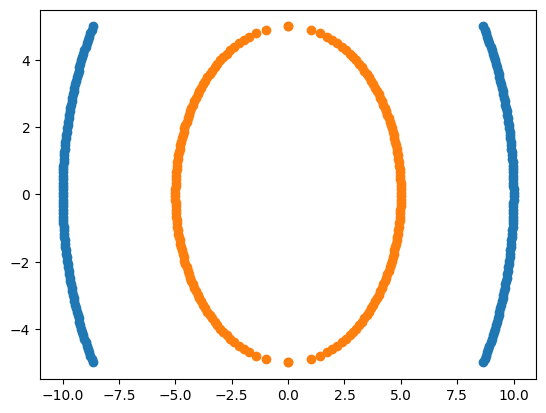

In [45]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [46]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [47]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [48]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [49]:
### Independent and Dependent features
X = df.iloc[:, :2]
y = df.Y

In [50]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [51]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [52]:
y_train

,Y
50,1
63,0
112,1
159,0
83,1
...,...
123,1
192,0
117,0
47,0


### Polynomial Kernel
![image.png](attachment:image.png)

In [53]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [54]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [55]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)


In [57]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [58]:
# import plotly.express as px

# fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
#               color='Y')
# fig.show()

In [59]:

# fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
#               color='Y')
# fig.show()

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0